   #                                                  Titanic Exercise II
   #### Practice matplotlib & seaborn

![titanic](https://userscontent2.emaze.com/images/a5f68f37-6349-4065-a1fc-921cbe7401b2/958230111417e36d6b3c67ffd7bc3494.jpeg)

First of all, import the needed libraries. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# visualisation libraries

/home/jose/.local/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


1. Read the `.csv` file you generated in **1_Titanic-Pandas** `titanic_cleaned.csv` and call the variable `titanic`.

Help: If you didn't get to the point in which you should have saved the file, ask the instructor. 

In [2]:
filename = "titanic_cleaned.csv"

In [3]:
titanic = pd.read_csv('./data/' + filename, index_col=0)
titanic.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,embarked,boat,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"


2. Using matplotlib find the appropriate visualization to show the distribution of the column `age`

(array([ 56.,  30.,  29., 133., 195., 166., 115.,  95.,  72.,  60.,  36.,
         26.,  23.,   4.,   4.,   2.]),
 array([ 0.17    ,  5.159375, 10.14875 , 15.138125, 20.1275  , 25.116875,
        30.10625 , 35.095625, 40.085   , 45.074375, 50.06375 , 55.053125,
        60.0425  , 65.031875, 70.02125 , 75.010625, 80.      ]),
 <BarContainer object of 16 artists>)

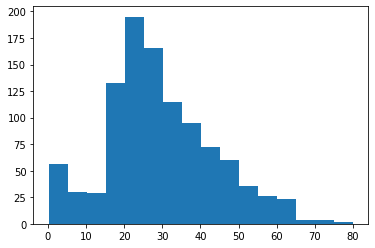

In [4]:
plt.hist(x=titanic.age, bins=16)

3. Now use seaborn to show the distribution of the column `age`.

<AxesSubplot:xlabel='age', ylabel='Count'>

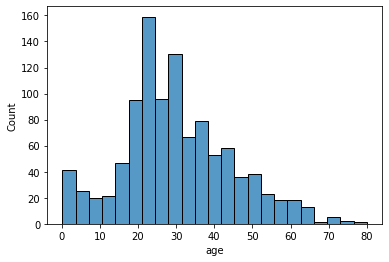

In [5]:
sns.histplot(data=titanic, x='age')

4. Use subplots to plot the distribution of the Age variable with bins equal to 10, 20 and 50.

Use `sns.histplot()` for that aim. 

<AxesSubplot:xlabel='age', ylabel='Count'>

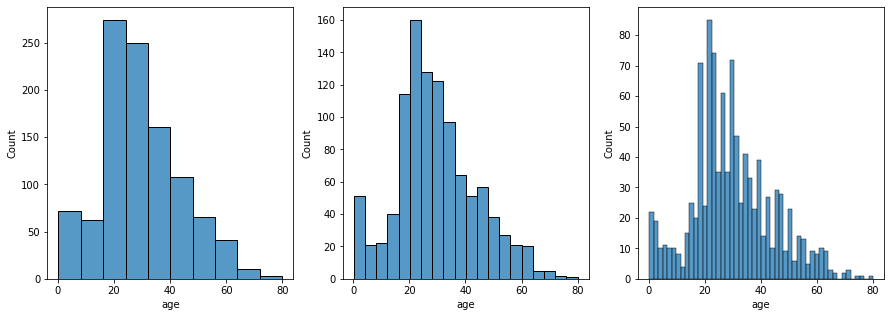

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
sns.histplot(ax=ax[0] ,data=titanic, x='age', bins=10)
sns.histplot(ax=ax[1] ,data=titanic, x='age', bins=20)
sns.histplot(ax=ax[2] ,data=titanic, x='age', bins=50)

5. Whether the bin size affects your plot? Why?

In [7]:
# Si el número de bins es demasiado bajo o alto, el gráfico no dara una buena visualización de la distribución de frecuencias.

6. Using matplotlib find the appropriate plot to visualize the column `'gender'` 

<BarContainer object of 2 artists>

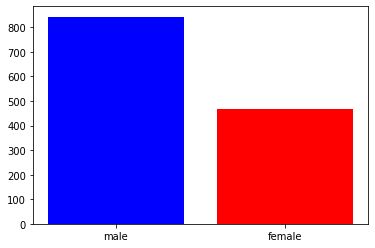

In [8]:
fig, ax = plt.subplots()
ax.bar(x=titanic.gender.value_counts().index, height=titanic.gender.value_counts(), color=['b', 'r'])

7. What if you also plot the column `'gender'` using the function [`countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the library [`seaborn`](https://seaborn.pydata.org/)?



<AxesSubplot:xlabel='gender', ylabel='count'>

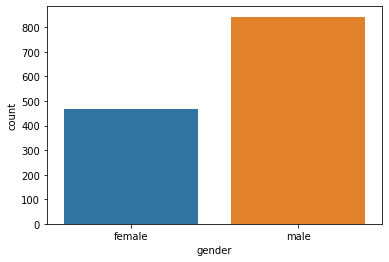

In [9]:
fig, ax = plt.subplots()
sns.countplot(ax=ax, data=titanic, x='gender')

6. Using the function [`catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) from the library `seaborn`, find out if the hypothesis _"Women are more likely to survive shipwrecks"_ is true or not.

You should get something like this:

![catplot](img/catplot.png)

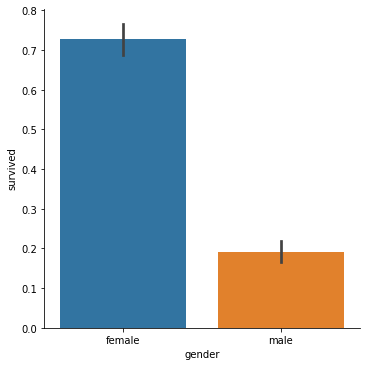

In [10]:
sns.catplot(data=titanic, x='gender', y='survived', kind='bar')

7. Use the appropriate plot to visualize the column `pclass`.

<AxesSubplot:xlabel='pclass', ylabel='count'>

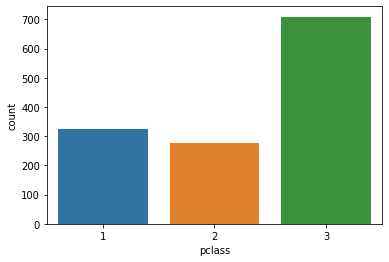

In [11]:
sns.countplot(data=titanic, x='pclass')

8. We would like to have in one single plot the summary statistics of the feature `age`. Choose the appropriate plot to show below.

<AxesSubplot:ylabel='age'>

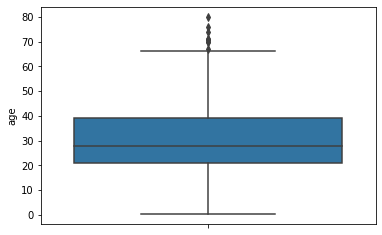

In [12]:
sns.boxplot(data=titanic, y='age')

9. What does the previous plot tell you about the feature Age? Comment.

In [13]:
# Indica que el 50% de los datos estan entre los 20 y los 40 años, que la mediana es un poco inferior a 30 años, y que la distribución no es simétrica.

10. Now in addition to the summary statistics, we also want to visualize the distribution of `age`. Choose the appropriate plot to show below.

<AxesSubplot:xlabel='age'>

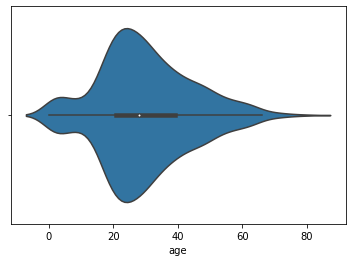

In [14]:
sns.violinplot(data=titanic, x='age')

11. Use the appropriate plot to display the distributions of `age` in relation to `gender`.

Hint: use Facetgrid to display the distribution of age for each categorical value of gender. 



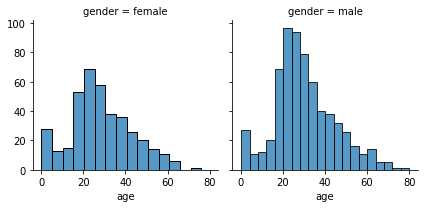

In [15]:
age_gender = sns.FacetGrid(data=titanic, col='gender')
age_gender.map(sns.histplot, 'age')

12. Using [`kdeplot`]("https://seaborn.pydata.org/generated/seaborn.kdeplot.html") from `seaborn` represent those who not survived distributed by age.

Hint: First you should "filter" the `titanic` dataset where the column "survived" is 0, indexing the column `"age"` only.

Arguments you should pass to the function: 

    - color = "red"
    - label = "Not Survived"
    - shade = True
    
You should get something like this: 

![kdeplot](img/kdeplot.png)

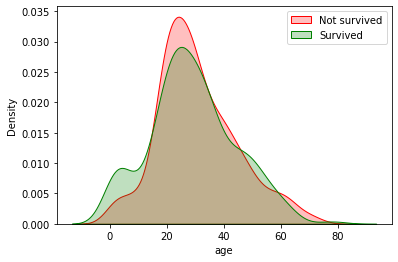

In [16]:
fig, ax = plt.subplots()
sns.kdeplot(ax=ax, data=titanic, x=titanic[titanic.survived == 0]['age'], color='red', label='Not survived', shade=True)
sns.kdeplot(ax=ax, data=titanic, x=titanic[titanic.survived == 1]['age'], color='green', label='Survived', shade=True)
ax.legend()

13. Using Seaborn plot the correlation matrix of various features.

Hint: search how to use `heatmap`



<AxesSubplot:>

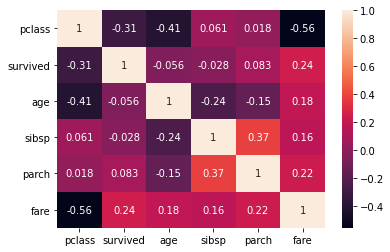

In [17]:
sns.heatmap(data=titanic.corr(), annot=True)

14. According to the previous plot, what are the most correlated feature? Comment.

In [18]:
# La correlación mayor se encuentra entre el coste del pasaje y la clase a la que daba acceso. La correlación es negativa ya que la clase más alta corresponde al valor numérico 1.